In [50]:
import pandas as pd
import re
import nltk
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import missingno as msno
import matplotlib.pyplot as plt
import emoji

In [51]:
df = pd.read_csv('../datasets/kaggle_datasets/Suicide_Detection.csv')
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [53]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [54]:
df.shape

(232074, 3)

In [55]:
df.dtypes

Unnamed: 0     int64
text          object
class         object
dtype: object

In [56]:
# Drop unnessasary columns
df = df.drop(['Unnamed: 0'], axis = 'columns')
df.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [57]:
df['class'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [58]:
# replace two string values with integer values
df['class'] = df['class'].replace({'suicide': 0, 'non-suicide': 1})
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,0
1,Am I weird I don't get affected by compliments...,1
2,Finally 2020 is almost over... So I can never ...,1
3,i need helpjust help me im crying so hard,0
4,"I’m so lostHello, my name is Adam (16) and I’v...",0
...,...,...
232069,If you don't like rock then your not going to ...,1
232070,You how you can tell i have so many friends an...,1
232071,pee probably tastes like salty tea😏💦‼️ can som...,1
232072,The usual stuff you find hereI'm not posting t...,0


In [59]:
# rename the 'class' column to 'score'
df = df.rename(columns={'class': 'score'})
df.head()

,text,score
0,Ex Wife Threatening SuicideRecently I left my ...,0
1,Am I weird I don't get affected by compliments...,1
2,Finally 2020 is almost over... So I can never ...,1
3,i need helpjust help me im crying so hard,0
4,"I’m so lostHello, my name is Adam (16) and I’v...",0


In [60]:
df.nunique()

text     232074
score         2
dtype: int64

In [61]:
# Remove punctuation marks
def remove_punctuation(text):
    # check if the input is a string
    if isinstance(text, str):
        # create a translation table with punctuation marks mapped to None
        translator = str.maketrans('', '', string.punctuation)
        # remove punctuation using the translation table
        return text.translate(translator)
    else:
        # if the input is not a string, return the input unchanged
        return text

# apply the remove_punctuation function to the 'A' column
df['text'] = df['text'].apply(lambda x: remove_punctuation(x))
df.head()

,text,score
0,Ex Wife Threatening SuicideRecently I left my ...,0
1,Am I weird I dont get affected by compliments ...,1
2,Finally 2020 is almost over So I can never hea...,1
3,i need helpjust help me im crying so hard,0
4,I’m so lostHello my name is Adam 16 and I’ve b...,0


In [62]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(232041, 2)

In [63]:
# Remove irrelevant data (if any)
df = df[['text', 'score']]
df.shape

(232041, 2)

In [64]:
# Remove missing values
df.dropna(inplace=True)
df.shape

(232041, 2)

In [65]:
# Remove inconsistencies (if any)
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df

,text,score
0,Ex Wife Threatening SuicideRecently I left my ...,0
1,Am I weird I dont get affected by compliments ...,1
2,Finally 2020 is almost over So I can never hea...,1
3,i need helpjust help me im crying so hard,0
4,Im so lostHello my name is Adam 16 and Ive bee...,0
...,...,...
232069,If you dont like rock then your not going to g...,1
232070,You how you can tell i have so many friends an...,1
232071,pee probably tastes like salty tea can someone...,1
232072,The usual stuff you find hereIm not posting th...,0


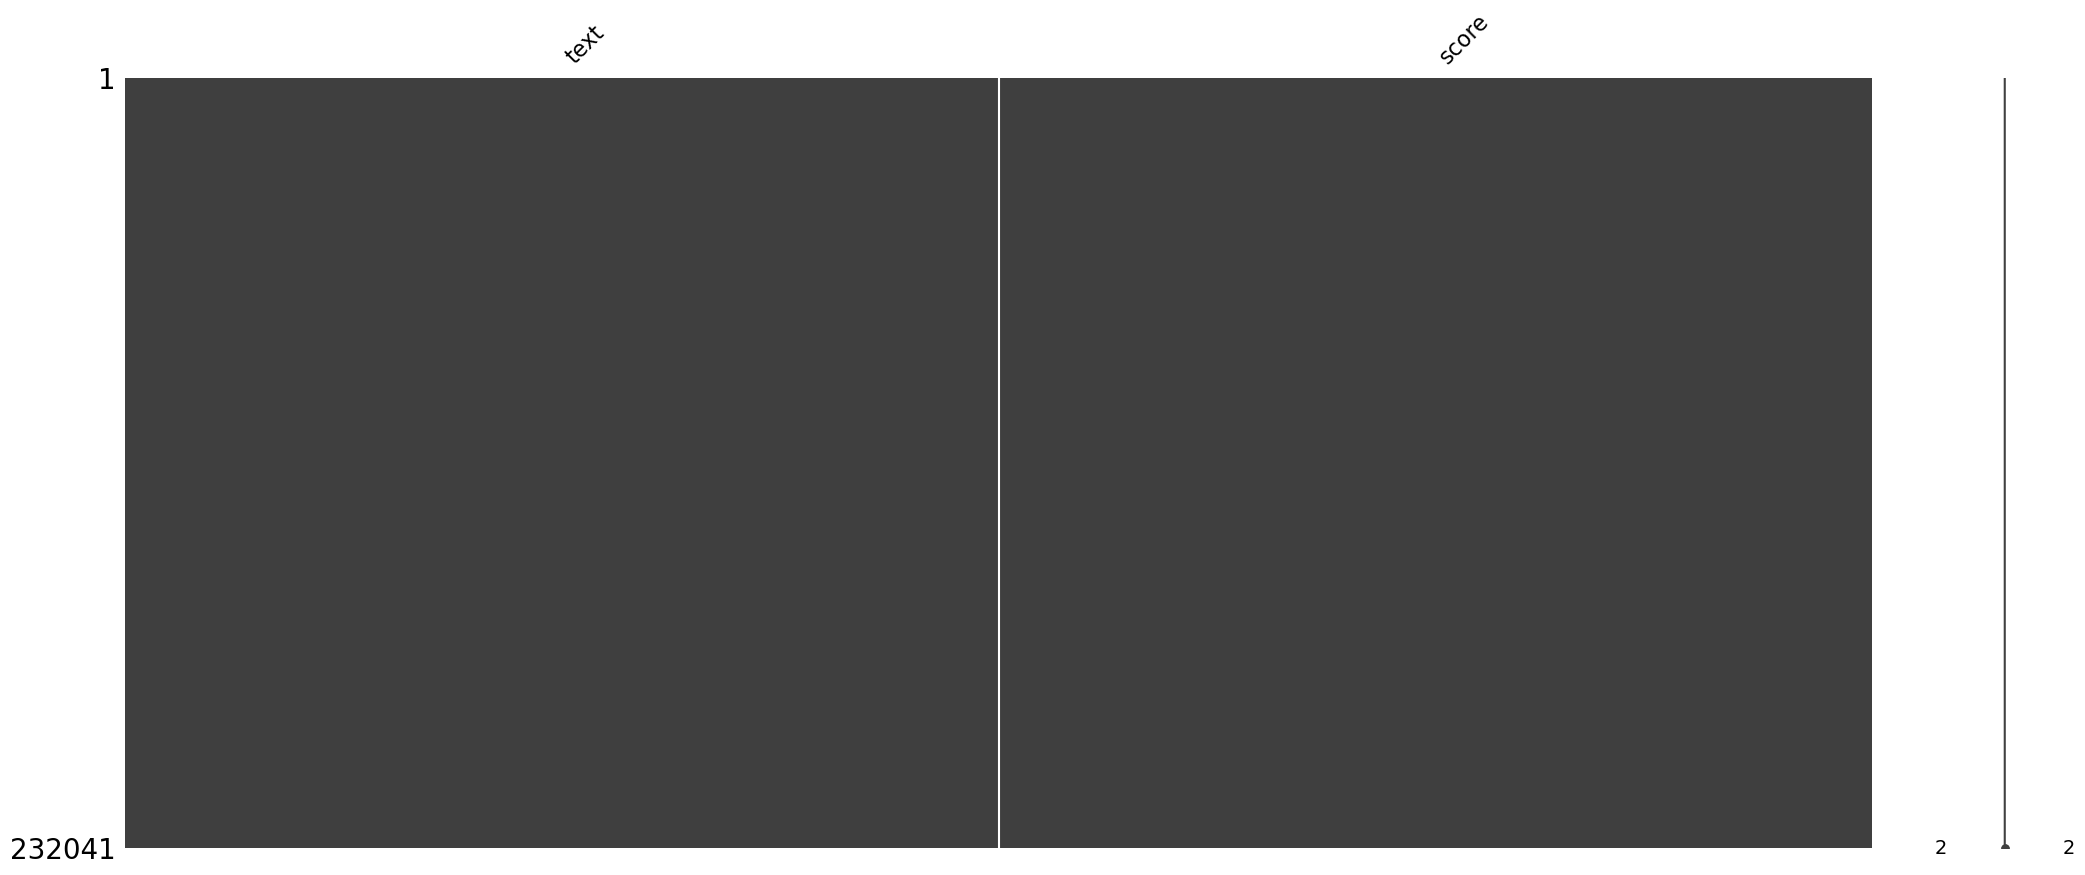

<Figure size 1500x900 with 0 Axes>

In [66]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/thaveesha/Developer/miniconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

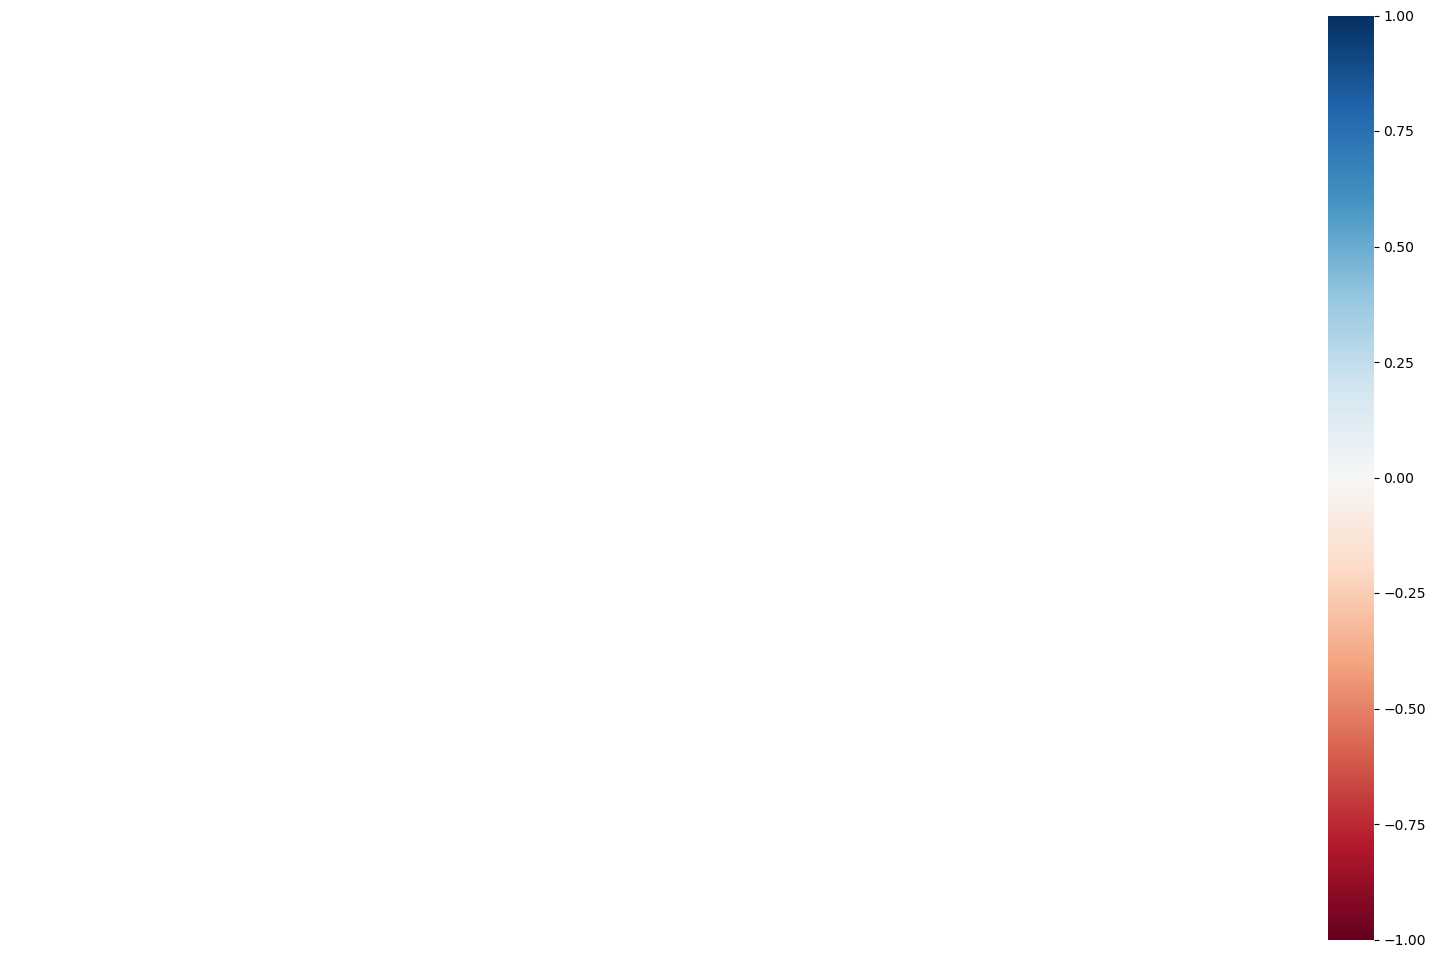

In [67]:
msno.heatmap(df, labels = True)

In [71]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_emoji)
df.shape

(232041, 2)

In [72]:
# Convert score column to integers
df['score'] = df['score'].astype(int)
df.dtypes

text     object
score     int64
dtype: object

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232041 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232041 non-null  object
 1   score   232041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ MB


In [74]:
nltk.data.path.append('/Users/thaveesha/Developer/nltk_data')

# Tokenize sentences into words
df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# Remove stop words
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

df

,text,score
0,"[ex, wife, threatening, suiciderecently, left,...",0
1,"[weird, dont, get, affected, compliments, comi...",1
2,"[finally, 2020, almost, never, hear, 2020, bad...",1
3,"[need, helpjust, help, im, crying, hard]",0
4,"[im, losthello, name, adam, 16, ive, strugglin...",0
...,...,...
232069,"[dont, like, rock, going, get, anything, go, h...",1
232070,"[tell, many, friends, lonely, everything, depr...",1
232071,"[pee, probably, tastes, like, salty, tea, some...",1
232072,"[usual, stuff, find, hereim, posting, sympathy...",0


In [75]:
# Apply Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.tail()

,text,score
232069,"[dont, like, rock, going, get, anything, go, h...",1
232070,"[tell, many, friend, lonely, everything, depri...",1
232071,"[pee, probably, taste, like, salty, tea, someo...",1
232072,"[usual, stuff, find, hereim, posting, sympathy...",0
232073,"[still, havent, beaten, first, bos, hollow, kn...",1


In [76]:
df.to_csv('../datasets/cleaned_datasets/cleaned_depression_dataset.csv', header=True, encoding='utf-8', index=False)
df = pd.read_csv('../datasets/cleaned_datasets/cleaned_depression_dataset.csv')
df

,text,score
0,"['ex', 'wife', 'threatening', 'suiciderecently...",0
1,"['weird', 'dont', 'get', 'affected', 'complime...",1
2,"['finally', '2020', 'almost', 'never', 'hear',...",1
3,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",0
4,"['im', 'losthello', 'name', 'adam', '16', 'ive...",0
...,...,...
232036,"['dont', 'like', 'rock', 'going', 'get', 'anyt...",1
232037,"['tell', 'many', 'friend', 'lonely', 'everythi...",1
232038,"['pee', 'probably', 'taste', 'like', 'salty', ...",1
232039,"['usual', 'stuff', 'find', 'hereim', 'posting'...",0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232041 entries, 0 to 232040
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232041 non-null  object
 1   score   232041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [78]:
df['score'].value_counts()

0    116030
1    116011
Name: score, dtype: int64